# E9 - SOFI Reconstruction Convergence Sample Analysis

This notebook is a sample analysis for [demo E8](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/Notebooks/E8_ReconstructionConvergence.ipynb). The moment-reconstructed images for videos with increasing frame numbers are saved in three .npy files and passed to E9 for reconstruction convergence exploration.

In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from functions import reconstruction
from functions import (filtering, masks, finterp)
import tifffile as tiff
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
filepath = '../sampledata/simulations/convergence_demo'
filename = 'nobleach_frame20000_3_InterpNum4.tif'

[==============================] 100.0%



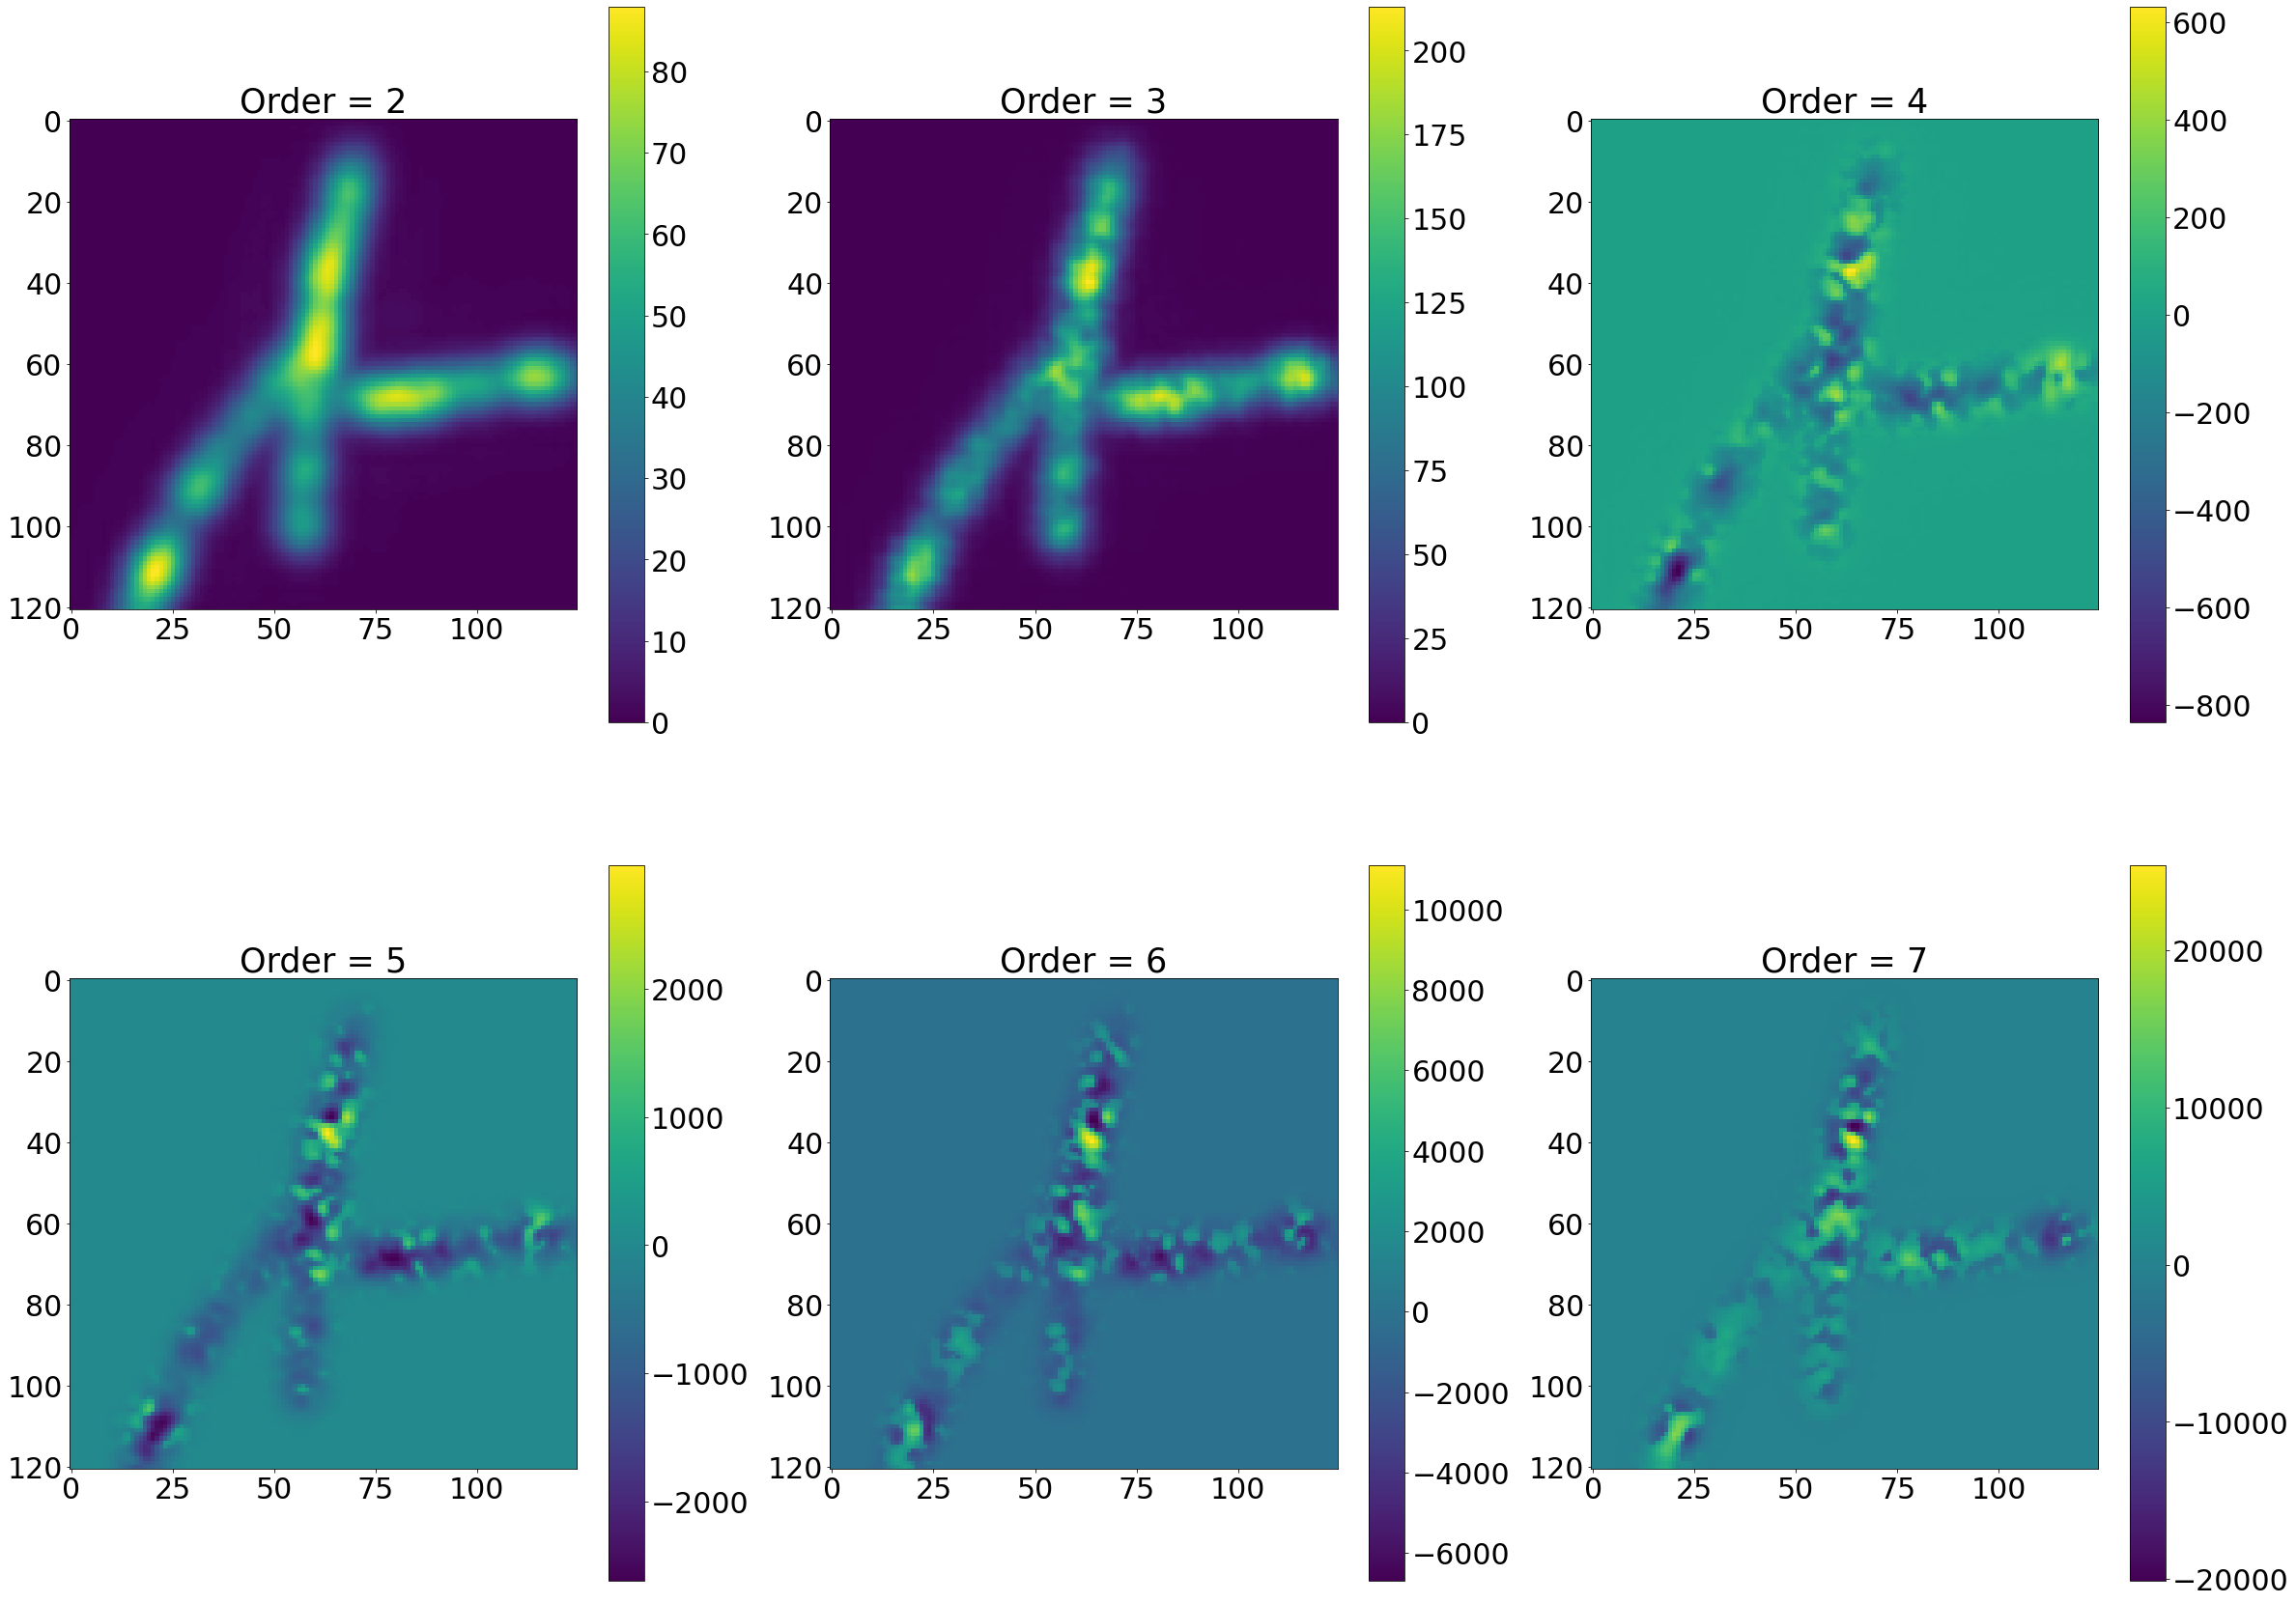

In [3]:
m_frame1000 = reconstruction.calc_block_moments(filepath, filename, 7, frames=[0,1000])
k_frame1000 = reconstruction.calc_cumulants_from_moments(m_frame1000)
# gamma display reconstructions
fig, axs = plt.subplots(2,3,figsize=(40,30))
for i in range(2,8):
    row = (i - 2) // 3
    ax = axs[row,i-2-row*3]
    img = ax.imshow((2*(k_frame1000[i]>0)-1)*abs(k_frame1000[i])**0.9**(i+1))
    ax.tick_params(axis='x', labelsize= 30)
    ax.tick_params(axis='y', labelsize= 30)
    ax.set_title(f'Order = {i}', fontsize=35)
    cb = plt.colorbar(img, ax=ax)
    cb.ax.tick_params(labelsize=30)
    cb.ax.yaxis.get_offset_text().set_fontsize(30)

[==============================] 100.0%



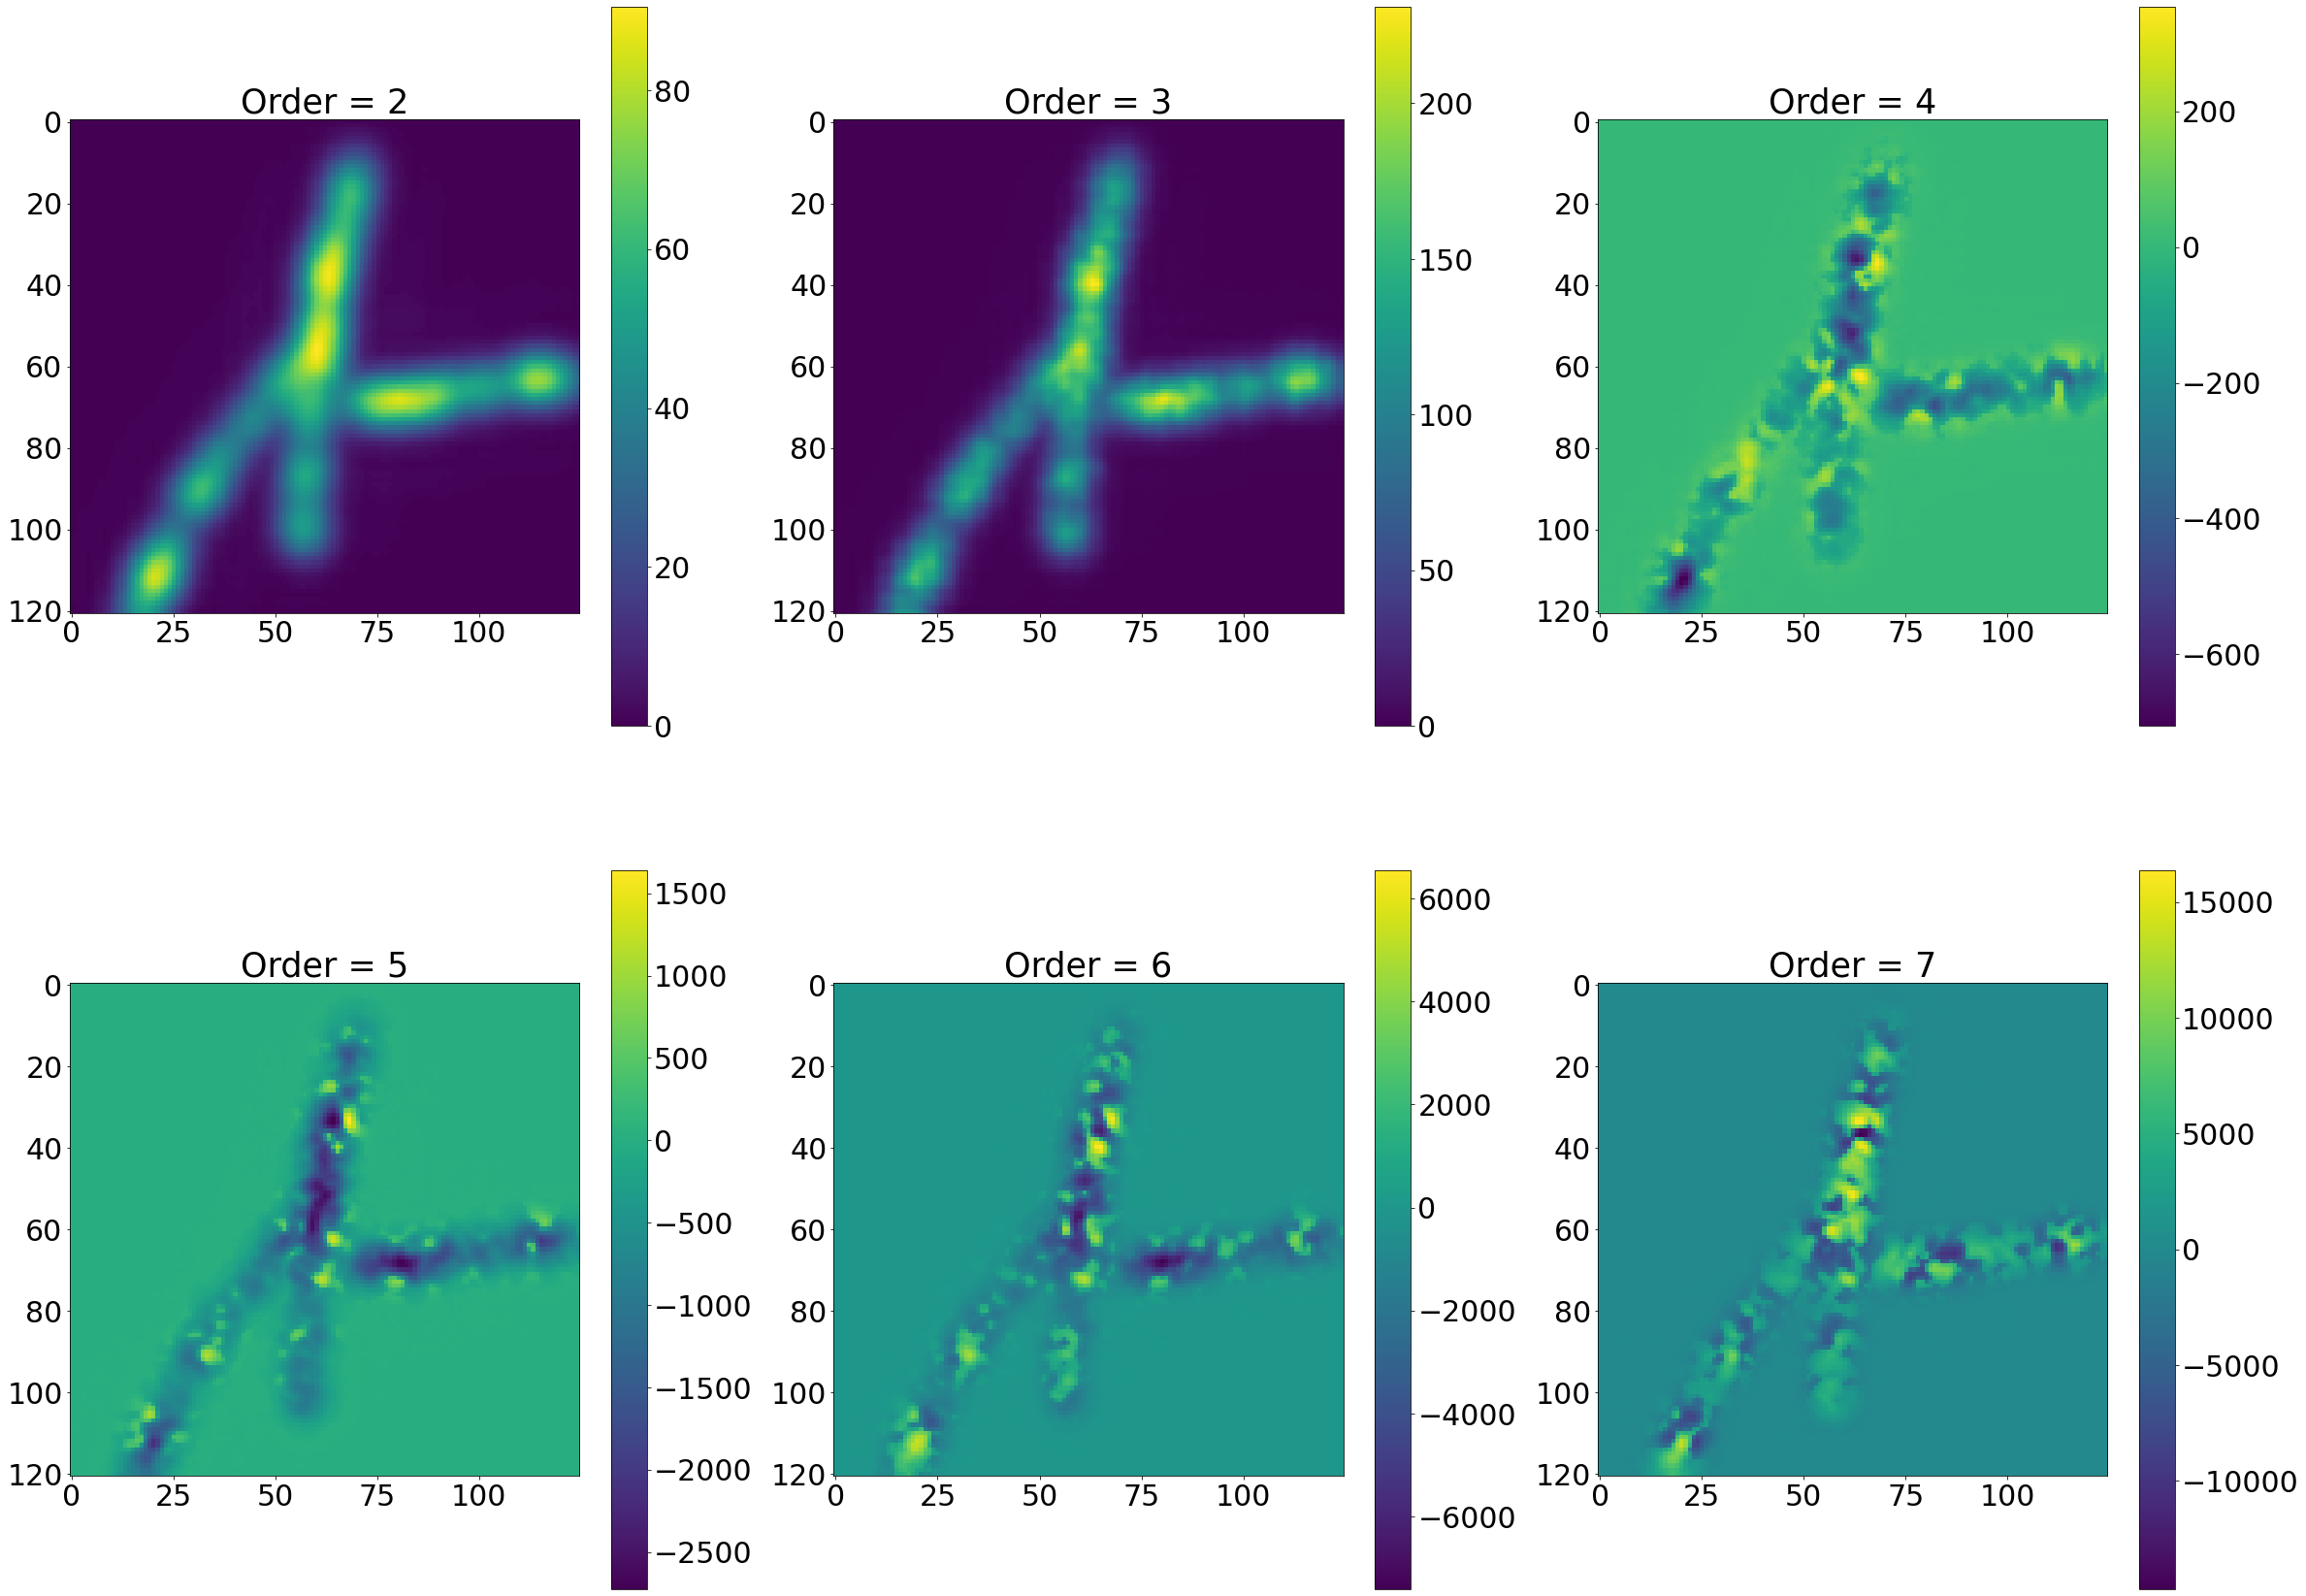

In [4]:
m_frame2000 = reconstruction.calc_block_moments(filepath, filename, 7, frames=[0,2000])
k_frame2000 = reconstruction.calc_cumulants_from_moments(m_frame2000)
# gamma display
fig, axs = plt.subplots(2,3,figsize=(40,30))
for i in range(2,8):
    row = (i - 2) // 3
    ax = axs[row,i-2-row*3]
    img = ax.imshow((2*(k_frame2000[i]>0)-1)*abs(k_frame2000[i])**0.9**(i+1))
    ax.tick_params(axis='x', labelsize= 30)
    ax.tick_params(axis='y', labelsize= 30)
    ax.set_title(f'Order = {i}', fontsize=35)
    cb = plt.colorbar(img, ax=ax)
    cb.ax.tick_params(labelsize=30)
    cb.ax.yaxis.get_offset_text().set_fontsize(30)

[==============================] 100.0%



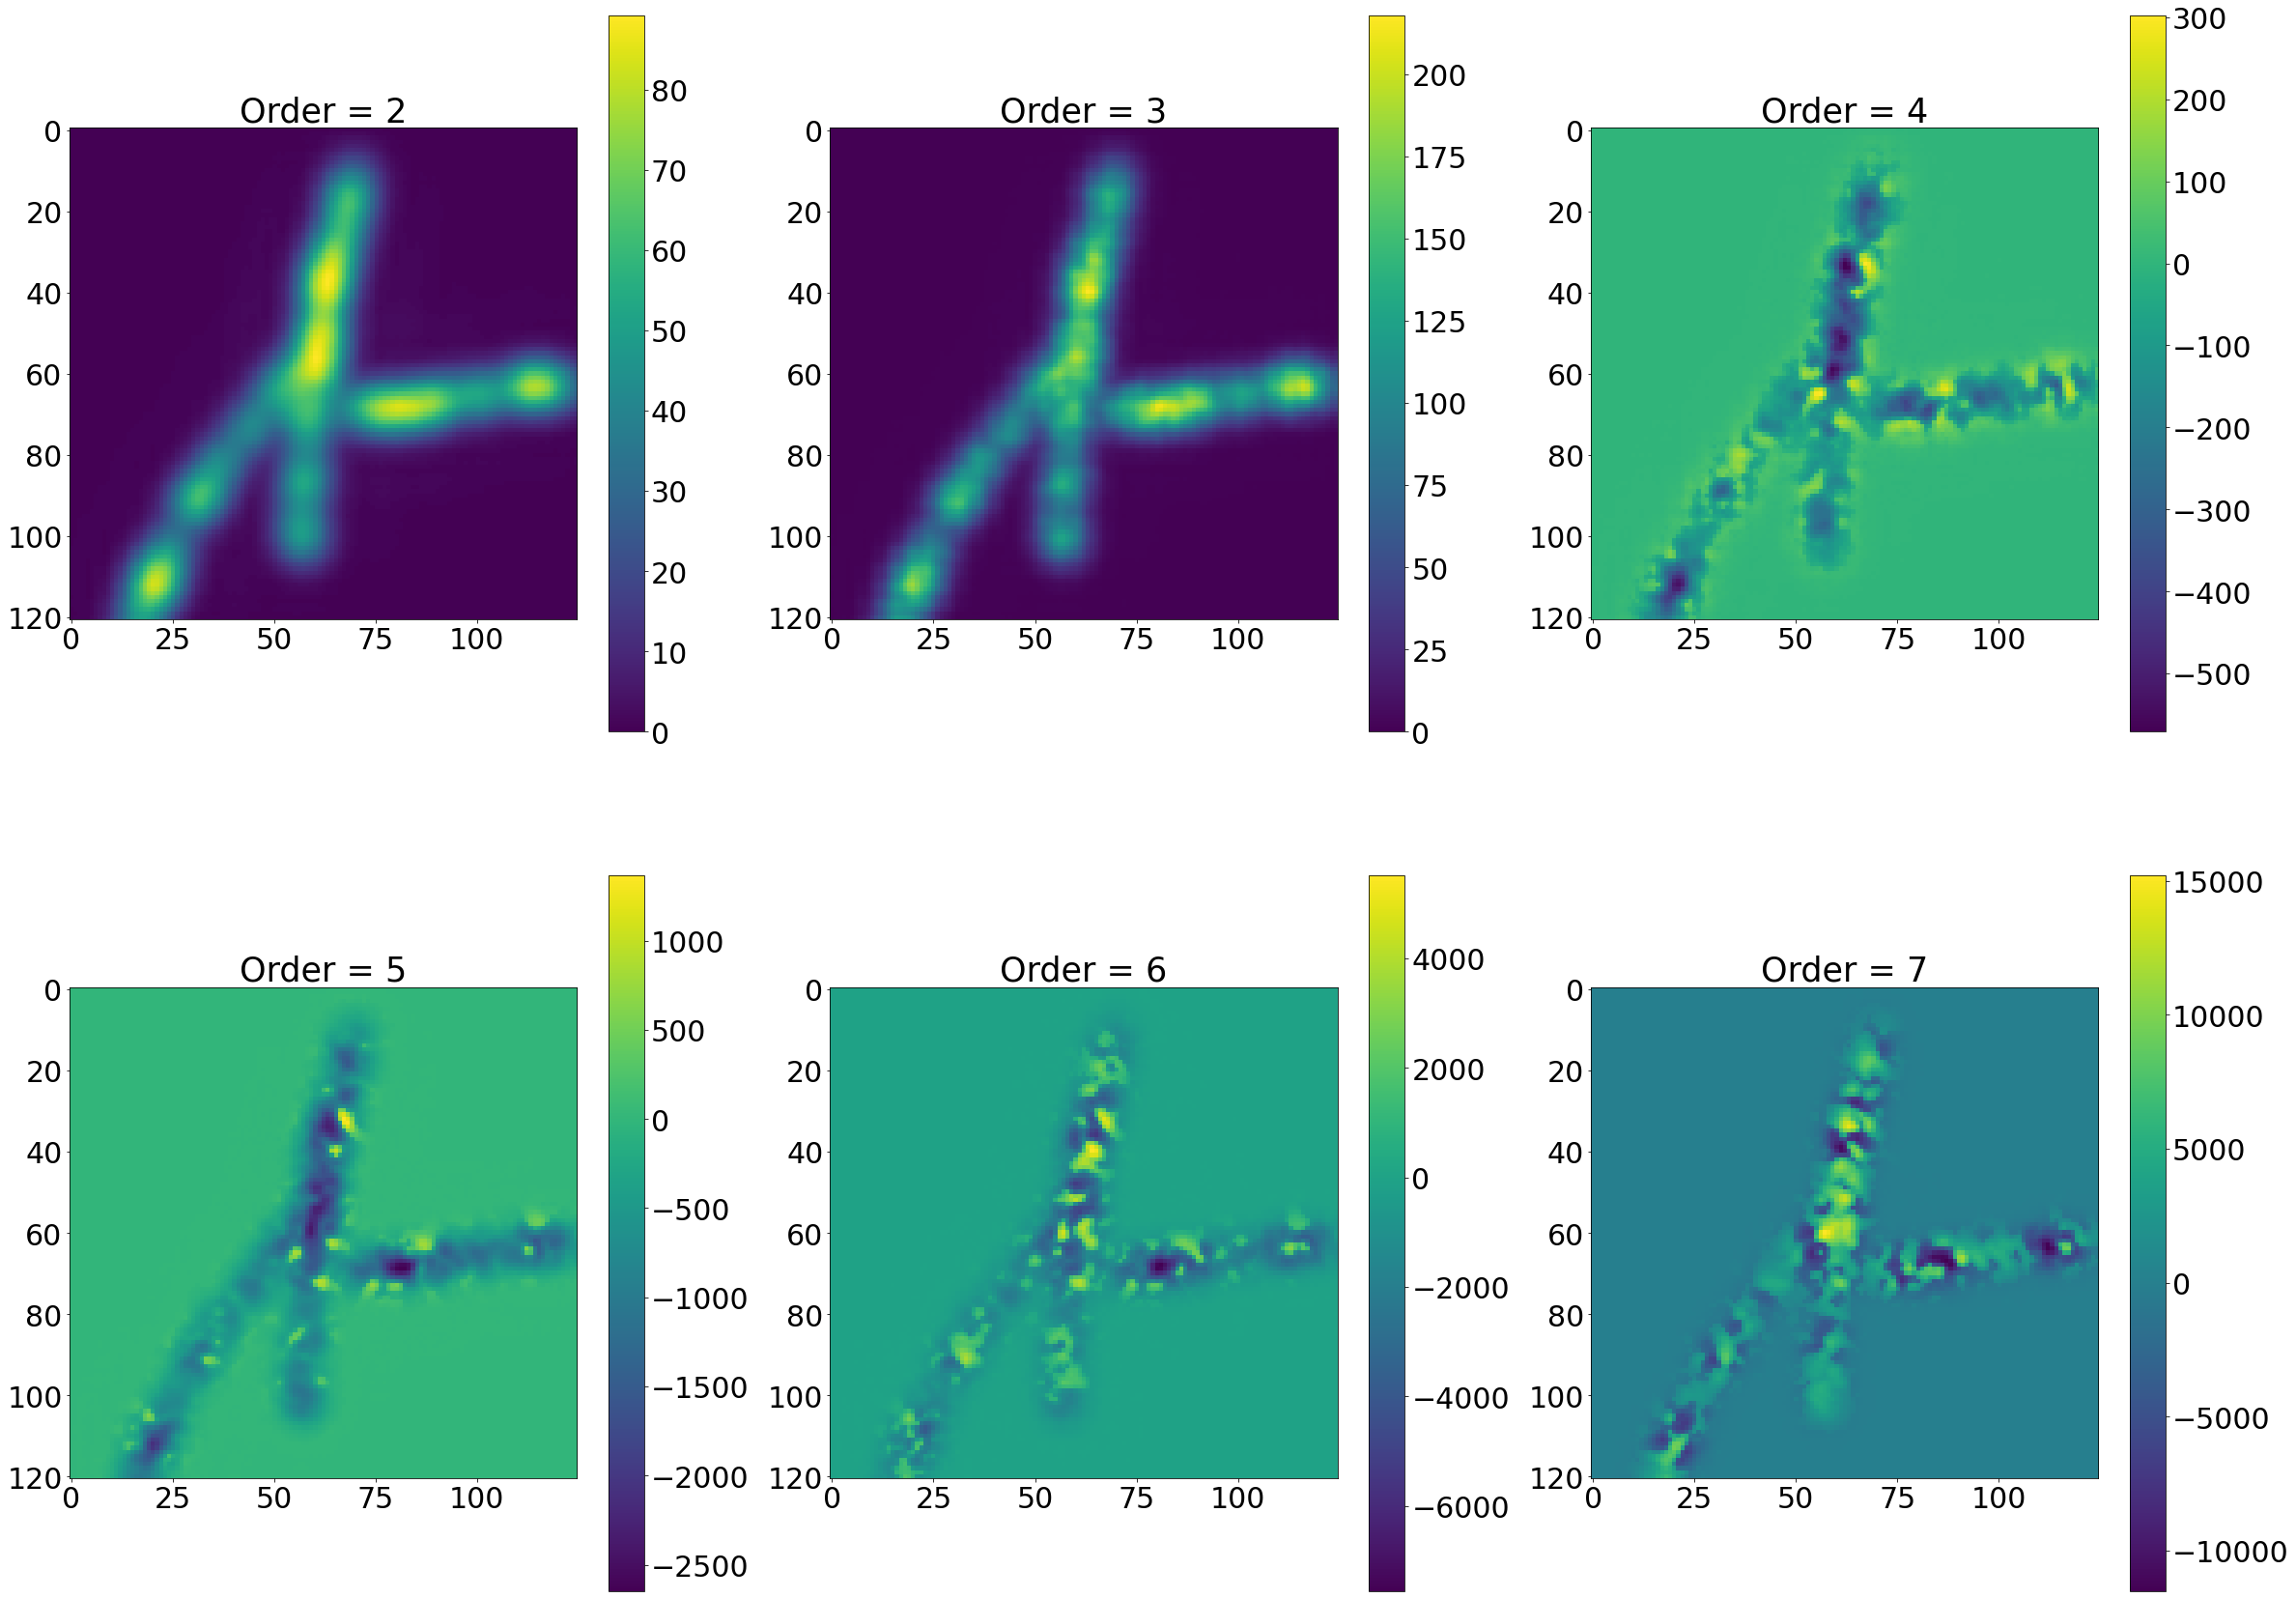

In [5]:
m_frame3000 = reconstruction.calc_block_moments(filepath, filename, 7, frames=[0,3000])
k_frame3000 = reconstruction.calc_cumulants_from_moments(m_frame3000)
# gamma display
fig, axs = plt.subplots(2,3,figsize=(40,30))
for i in range(2,8):
    row = (i - 2) // 3
    ax = axs[row,i-2-row*3]
    img = ax.imshow((2*(k_frame3000[i]>0)-1)*abs(k_frame3000[i])**0.9**(i+1))
    ax.tick_params(axis='x', labelsize= 30)
    ax.tick_params(axis='y', labelsize= 30)
    ax.set_title(f'Order = {i}', fontsize=35)
    cb = plt.colorbar(img, ax=ax)
    cb.ax.tick_params(labelsize=30)
    cb.ax.yaxis.get_offset_text().set_fontsize(30)

In [13]:
# save all cumulants
from numpy import save
all_cumulants = []
frame_lst = list(range(1000, 4000, 1000))
for i in range(3):
    x = eval(compile("k_frame" + str(frame_lst[i]), "<string>", "eval"))
    all_cumulants.append(x)
save('frame1000_3000.npy', all_cumulants)